In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import hdf5storage
import h5py
from scipy.stats import norm 

In [2]:
with h5py.File('hw3_data3.mat', 'r') as file:
    pop1 = list(file['pop1'])
with h5py.File('hw3_data3.mat', 'r') as file:
    pop2 = list(file['pop2'])    

pop1 = np.array(pop1)
pop2 = np.array(pop2)
pop1.flatten()
pop2.flatten()

print("Shape of pop1 is: ")
print(np.shape(pop1))
print("Shape of pop2 is: ")
print(np.shape(pop2))

Shape of pop1 is: 
(7, 1)
Shape of pop2 is: 
(5, 1)


In [3]:
# Part A

def bootstrap(data, number_iterations):
    np.random.seed(7)
    size = np.shape(data)[0]
    data_bootstrap = np.zeros(np.shape(data)[0])
    result_bootstrap = []
    
    for i in range(number_iterations):
        for j in range(size):
            data_bootstrap = np.array(data_bootstrap)
            index = np.random.randint(0, size, size=1)
            data_bootstrap[j] = data[index]
        result_bootstrap.append(data_bootstrap)
        data_bootstrap = np.zeros(np.shape(data)[0])
    result_bootstrap = np.array(result_bootstrap)   
    return result_bootstrap

In [4]:
def difference_of_means(pop1, pop2, number_iterations):
    pops = np.concatenate((pop1, pop2))
    pops_bootstrap = bootstrap(pops, number_iterations)
    pop1_bootstrap = []
    pop2_bootstrap = []
    for i in range(np.shape(pops_bootstrap)[1]):
        if (i < np.shape(pop1)[0]):
            pop1_bootstrap.append(pops_bootstrap[:,i])
        else:
            pop2_bootstrap.append(pops_bootstrap[:,i])
    pop1_bootstrap = np.array(pop1_bootstrap)
    pop2_bootstrap = np.array(pop2_bootstrap)
    mean1 = np.mean(pop1_bootstrap, axis=0)
    mean2 = np.mean(pop2_bootstrap, axis=0)
    diff_of_means = mean1 - mean2
    sigma = np.std(diff_of_means)
    mu = np.mean(diff_of_means)
    return diff_of_means, sigma, mu

In [5]:
diff_of_means, sigma_pops, mu_pops = difference_of_means(pop1, pop2, 10000)

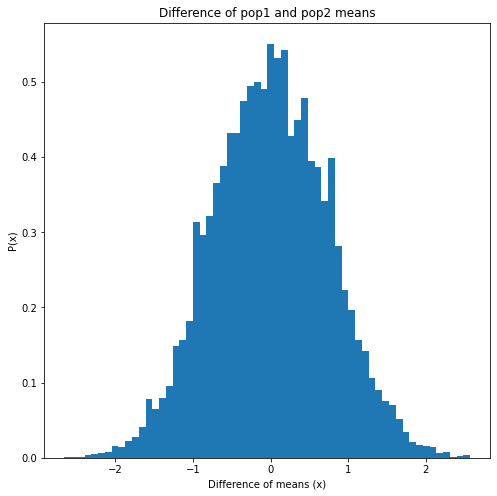

In [6]:
fig_num = 0
plt.figure(fig_num, figsize=(8,8))
plt.xlabel('Difference of means (x)')
plt.ylabel('P(x)')
plt.title('Difference of pop1 and pop2 means')
plt.hist(diff_of_means, bins=60, density=True)
plt.show(block=False)

In [7]:
def z_and_p_values(line, sigma, mu):
    z = (line - mu) / sigma
    p = 2 * (1 - norm.cdf(np.abs(z)))
    return z,p



In [8]:
pops_line = np.mean(pop1) - np.mean(pop2)
z,p = z_and_p_values(pops_line, sigma_pops, mu_pops)
print("z-value is : ")
print(z)
print("\n")
print("Two side p-value is : ")
print(p)

z-value is : 
2.5328129326156494


Two side p-value is : 
0.0113151320630549


In [9]:
# Part B

with h5py.File('hw3_data3.mat', 'r') as file:
    vox1 = list(file['vox1'])
with h5py.File('hw3_data3.mat', 'r') as file:
    vox2 = list(file['vox2'])    

vox1 = np.array(vox1)
vox2 = np.array(vox2)

print("Shape of vox1 is: ")
print(np.shape(vox1))
print("Shape of vox2 is: ")
print(np.shape(vox2))

Shape of vox1 is: 
(50, 1)
Shape of vox2 is: 
(50, 1)


In [10]:
def correlation(vox1, vox2, number_iterations, PartC = False):
    size = np.shape(vox1)[0]
    vox1_bootstrap = bootstrap(vox1, number_iterations)
    vox2_bootstrap = bootstrap(vox2, number_iterations)
    if (PartC == True):
        np.random.seed(15) 
        np.random.shuffle(vox2_bootstrap) 
    
    result_bootstrap = np.zeros(number_iterations)
    
    for i in range(number_iterations):
        result_bootstrap[i] = np.corrcoef(vox1_bootstrap[i], vox2_bootstrap[i])[0, 1]
    result_bootstrap = np.array(result_bootstrap)
    return result_bootstrap

In [11]:
cor_bootstrap = correlation(vox1, vox2, 10000)

In [12]:
sorted_cor_bootstrap = np.sort(cor_bootstrap)
corr_mean = np.mean(sorted_cor_bootstrap)
lowerPercentile = np.percentile(sorted_cor_bootstrap, 5 / 2)
upperPercentile = np.percentile(sorted_cor_bootstrap, 95 + (5 / 2))
print("Mean if correlation is: " + str(corr_mean))
print("\n")
print('95 Percent Confidence Interval : (%1.4f, %1.4f)' % (lowerPercentile,upperPercentile))


Mean if correlation is: 0.5575702100845678


95 Percent Confidence Interval : (0.3206, 0.7576)


In [13]:
# Part C
cor_bootstrap_c = correlation(vox1, vox2, 10000, True)

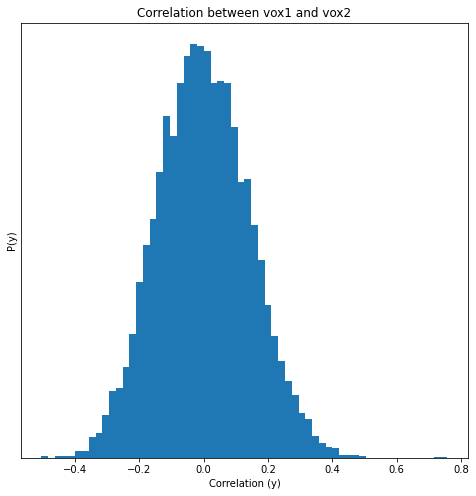

In [14]:
fig_num += 1
plt.figure(fig_num, figsize=(8,8))
plt.yticks([])
plt.xlabel('Correlation (y)')
plt.ylabel('P(y)')
plt.title('Correlation between vox1 and vox2')
plt.hist(cor_bootstrap_c, bins=60, density=True)
plt.show(block=False)



In [15]:
vox1 = np.array(vox1)
vox2 = np.array(vox2)
vox1 = vox1.flatten()
vox2 = vox2.flatten()

c_line = np.corrcoef(vox1, vox2)[0,1]
sigma_c = np.std(cor_bootstrap_c )
mu_c = np.mean(cor_bootstrap_c )

z = (c_line - mu_c) / sigma_c
p = 1 - norm.cdf(z)
print("z-value is : ")
print(z)
print("\n")
print("p-value is : ")
print(p)

z-value is : 
3.971119824778546


p-value is : 
3.576779294101051e-05


In [16]:
# Part D

with h5py.File('hw3_data3.mat', 'r') as file:
    building = list(file['building'])
with h5py.File('hw3_data3.mat', 'r') as file:
    face = list(file['face'])    

building = np.array(building)
face = np.array(face)

print("Shape of building is: ")
print(np.shape(building))
print("Shape of face is: ")
print(np.shape(face))

Shape of building is: 
(20, 1)
Shape of face is: 
(20, 1)


In [17]:
difference_in_means = []
size = np.shape(face)[0]
sample = []
for i in range(10000):
    for j in range(size):
        choices = []
        index = np.random.randint(0, size, size=1)
        choices.append(building[index] - face[index])
        choices.append(face[index] - building[index])
        for k in range(2):
            choices.append(0)
        chosenOne = int(np.random.randint(0, len(choices), size=1))
        sample.append(choices[chosenOne])
    difference_in_means.append(np.mean(sample))
    sample = []    
difference_in_means = np.array(difference_in_means)
difference_in_means = difference_in_means.flatten()

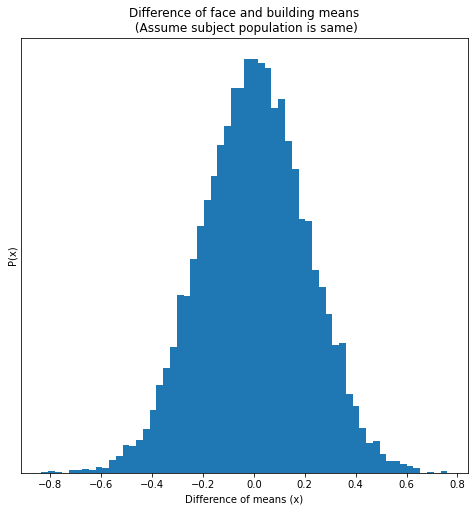

In [18]:
fig_num += 1
plt.figure(fig_num, figsize=(8,8))
plt.yticks([])
plt.xlabel('Difference of means (x)')
plt.ylabel('P(x)')
plt.title('Difference of face and building means\n (Assume subject population is same)')
plt.hist(difference_in_means, bins=60, density=True)
plt.show(block=False)

In [19]:
mu_fb = np.mean(difference_in_means)
sigma_fb = np.std(difference_in_means)
fb_line = np.mean(building) - np.mean(face)

z,p = z_and_p_values(fb_line, sigma_fb, mu_fb)
print("z-value is : ")
print(z)
print("\n")
print("Two side p-value is : ")
print(p)

z-value is : 
-3.5887412544409685


Two side p-value is : 
0.00033227841905580924


In [20]:
# Part E
diff_of_means_fb, sigma_fb_2, mu_fb_2 = difference_of_means(face, building, 10000)

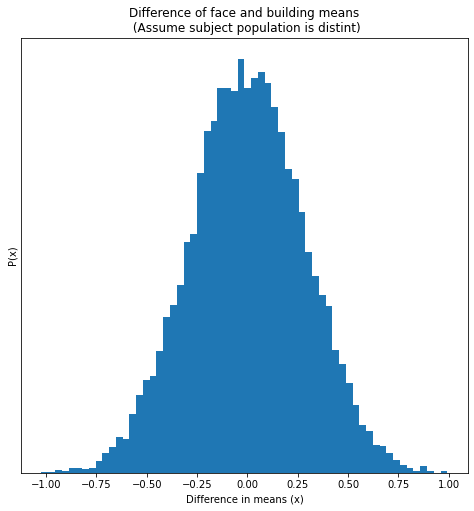

In [21]:
fig_num += 1
plt.figure(fig_num, figsize=(8,8))
plt.yticks([])
plt.xlabel('Difference in means (x)')
plt.ylabel('P(x)')
plt.title('Difference of face and building means\n (Assume subject population is distint)')

plt.hist(diff_of_means_fb, bins=60, density=True)
plt.show(block=False)

In [22]:
mu_fb_2 = np.mean(diff_of_means_fb)
sigma_fb_2 = np.std(diff_of_means_fb)
fb_line_2 = np.mean(building) - np.mean(face)

z,p = z_and_p_values(fb_line_2, sigma_fb_2, mu_fb_2)
print("z-value is : ")
print(z)
print("\n")
print("Two side p-value is : ")
print(p)

z-value is : 
-2.651567544945334


Two side p-value is : 
0.00801190860639811
